In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [65]:
BOTANIC_ANALYSES="/Users/rafikaayari/PycharmProjectsdatascience/pythonProject/NOTEBOOK BOTANIC ANALYSES.pkl"
df_BOTANIC_F=pd.read_pickle(BOTANIC_ANALYSES)

In [66]:
df_BOTANIC_F

,MAGASIN,SEXE,AGE_GROUP,ANCIENNETE_ADHESION_CAT,ANCIENNETE_READ,LIBELLEDEPARTEMENT,TIC_TOTALTTC,FREQ_MAG,TYPE_UNIVERS,Quantite,...,NBRE_FAM_ARTICLE,TOTAL_REMISE,Variete_Panier,UNIVERS_PREFERE,TOTAL_ACHAT_2016,ANCIENNETE_1ERE_CDE_2016,ANCIENNETE_DERNIERE_CDE_2016,TEMPS_MOY_CDE_2016,FREQ_COMMANDE_2016,ATTRITION
0,PRI,FEMME,Inconnue,8 ans+,6-8 mois,69,11.21,31,UNIVERS_U1,2.0,...,1,1.650,6,0,1936.76,346,41.0,5.169492,0.126085,non_attritionniste
1,PRI,FEMME,Inconnue,8 ans+,6-8 mois,69,11.21,31,UNIVERS_U2,2.0,...,1,1.650,6,0,1936.76,346,41.0,5.169492,0.126085,non_attritionniste
2,PRI,FEMME,Inconnue,8 ans+,6-8 mois,69,11.21,31,UNIVERS_U3,2.0,...,1,1.650,6,0,1936.76,346,41.0,5.169492,0.126085,non_attritionniste
3,PRI,FEMME,Inconnue,8 ans+,6-8 mois,69,11.21,31,UNIVERS_U4,2.0,...,1,1.650,6,0,1936.76,346,41.0,5.169492,0.126085,non_attritionniste
4,PRI,FEMME,Inconnue,8 ans+,6-8 mois,69,28.55,31,UNIVERS_U1,3.0,...,2,0.000,6,0,1936.76,346,41.0,5.169492,0.126085,non_attritionniste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408787,MUL,FEMME,AGE DE 61-100,8 ans+,0-4 mois,68,29.47,9,UNIVERS_U4,15.0,...,2,5.434,6,0,1739.20,261,23.0,21.636364,0.940711,non_attritionniste
7408788,MUL,FEMME,AGE DE 61-100,8 ans+,0-4 mois,68,151.39,9,UNIVERS_U1,10.0,...,1,0.333,6,0,1739.20,261,23.0,21.636364,0.940711,non_attritionniste
7408789,MUL,FEMME,AGE DE 61-100,8 ans+,0-4 mois,68,151.39,9,UNIVERS_U2,10.0,...,1,0.333,6,0,1739.20,261,23.0,21.636364,0.940711,non_attritionniste
7408790,MUL,FEMME,AGE DE 61-100,8 ans+,0-4 mois,68,151.39,9,UNIVERS_U3,10.0,...,1,0.333,6,0,1739.20,261,23.0,21.636364,0.940711,non_attritionniste


In [67]:
df_BOTANIC_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408792 entries, 0 to 7408791
Data columns (total 21 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   MAGASIN                       object 
 1   SEXE                          object 
 2   AGE_GROUP                     object 
 3   ANCIENNETE_ADHESION_CAT       object 
 4   ANCIENNETE_READ               object 
 5   LIBELLEDEPARTEMENT            int64  
 6   TIC_TOTALTTC                  float64
 7   FREQ_MAG                      int64  
 8   TYPE_UNIVERS                  object 
 9   Quantite                      float64
 10  NBRE_ARTICLE                  int64  
 11  NBRE_FAM_ARTICLE              int64  
 12  TOTAL_REMISE                  float64
 13  Variete_Panier                int64  
 14  UNIVERS_PREFERE               int64  
 15  TOTAL_ACHAT_2016              float64
 16  ANCIENNETE_1ERE_CDE_2016      int64  
 17  ANCIENNETE_DERNIERE_CDE_2016  float64
 18  TEMPS_MOY_CDE_2016    

In [68]:
import pandas as pd

# Définition des variables catégorielles
var_cat = df_BOTANIC_F.select_dtypes(include=['object']).columns.tolist()
print(var_cat)

['MAGASIN', 'SEXE', 'AGE_GROUP', 'ANCIENNETE_ADHESION_CAT', 'ANCIENNETE_READ', 'TYPE_UNIVERS', 'ATTRITION']


In [69]:
import pandas as pd

# Définition des variables quantitatives
var_quan = df_BOTANIC_F.select_dtypes(include=['int64','float64']).columns.tolist()
print(var_quan)

['LIBELLEDEPARTEMENT', 'TIC_TOTALTTC', 'FREQ_MAG', 'Quantite', 'NBRE_ARTICLE', 'NBRE_FAM_ARTICLE', 'TOTAL_REMISE', 'Variete_Panier', 'UNIVERS_PREFERE', 'TOTAL_ACHAT_2016', 'ANCIENNETE_1ERE_CDE_2016', 'ANCIENNETE_DERNIERE_CDE_2016', 'TEMPS_MOY_CDE_2016', 'FREQ_COMMANDE_2016']


In [70]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df_BOTANIC_F est déjà défini
# Remplacer les valeurs catégorielles par des valeurs numériques
df = df_BOTANIC_F.copy()
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Séparation en X (caractéristiques) et y (cible)
X = df.drop(columns=['ATTRITION'])
y = df['ATTRITION']

# Diviser le dataset en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mise à l'échelle des variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des poids de la classe
class_weights = {0: 10, 1: 90}  

# Entraînement du modèle
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble d'apprentissage et de test
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


Analyse du modèle avant rééquilibrage des données

MATRICE DE CONFUSION AVANT RÉÉQUILIBRAGE

Distribution initiale des classes :
ATTRITION
1    6337476
0    1071316
Name: count, dtype: int64
Ensemble d'apprentissage :
Accuracy : 0.9976281074568939
Precision : 0.9972348193809466
Recall : 1.0
F1 Score : 0.9986154954879515
AUC ROC : 0.99999828452587
Confusion Matrix :
[[ 737620   12301]
 [      0 4436233]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    749921
           1       1.00      1.00      1.00   4436233

    accuracy                           1.00   5186154
   macro avg       1.00      0.99      1.00   5186154
weighted avg       1.00      1.00      1.00   5186154


Ensemble de test :
Accuracy : 0.99755830684079
Precision : 0.9971536763047617
Recall : 1.0
F1 Score : 0.998574809876171
AUC ROC : 0.999998281461402
Confusion Matrix :
[[ 315968    5427]
 [      0 1901243]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.98    

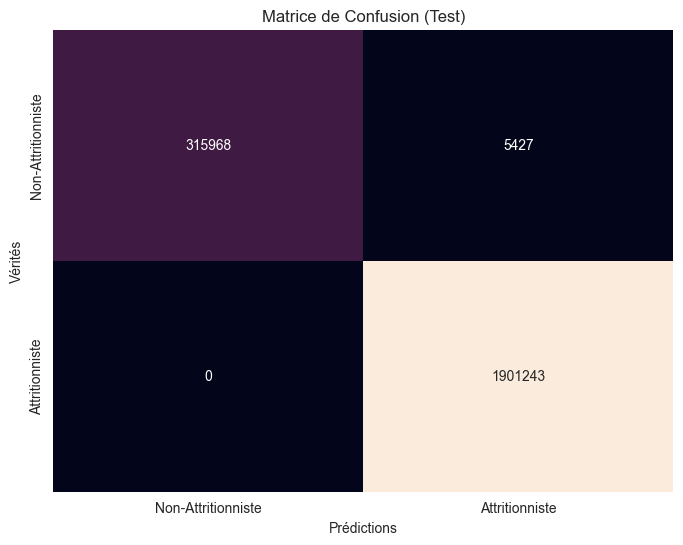

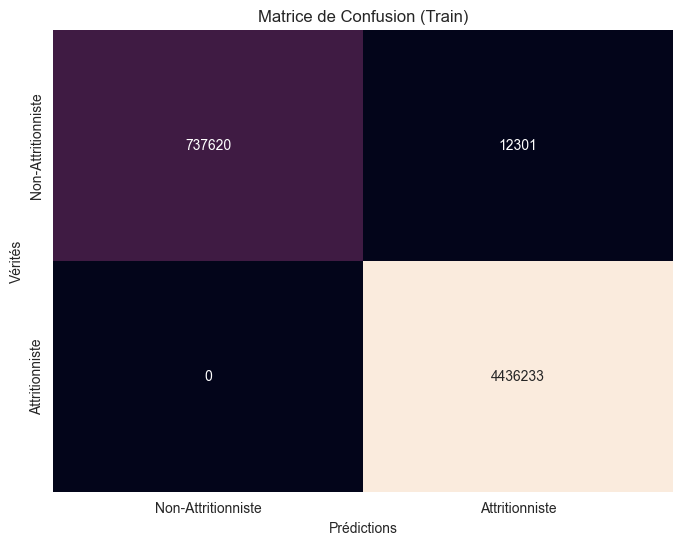

In [71]:
# Calcul des métriques de performance sur l'ensemble d'apprentissage
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, zero_division=0)
train_recall = recall_score(y_train, y_train_pred, zero_division=0)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])

# Calcul des métriques de performance sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=0)
test_recall = recall_score(y_test, y_test_pred, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Distribution initiale des classes :")
print(pd.Series(y).value_counts())
y.value_counts(normalize=True)

# Affichage des résultats
print(f"Ensemble d'apprentissage :")
print(f"Accuracy : {train_accuracy}")
print(f"Precision : {train_precision}")
print(f"Recall : {train_recall}")
print(f"F1 Score : {train_f1}")
print(f"AUC ROC : {train_roc_auc}")
print(f"Confusion Matrix :\n{train_conf_matrix}")
print("\nRapport de classification :\n", classification_report(y_train, y_train_pred))

print(f"\nEnsemble de test :")
print(f"Accuracy : {test_accuracy}")
print(f"Precision : {test_precision}")
print(f"Recall : {test_recall}")
print(f"F1 Score : {test_f1}")
print(f"AUC ROC : {test_roc_auc}")
print(f"Confusion Matrix :\n{test_conf_matrix}")
print("\nRapport de classification :\n", classification_report(y_test, y_test_pred))


# Visualisation de la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion (Test)')
plt.show()

# Visualisation de la matrice de confusion pour l'ensemble d'apprentissage
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion (Train)')
plt.show()



COURBES ROC AVANT RÉÉQUILIBRAGE

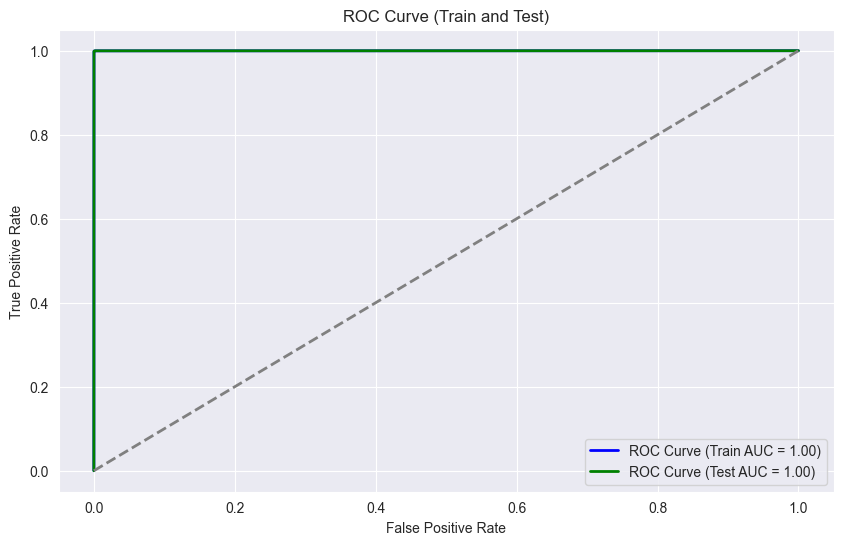

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns

# Supposons que model soit déjà entraîné avec X_train_scaled, y_train et que vous avez X_test_scaled, y_test

# Prédictions des probabilités pour l'ensemble de train
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]  # Probabilité pour la classe positive (attrition)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
train_roc_auc = auc(fpr_train, tpr_train)  # Calculer l'AUC pour train

# Prédictions des probabilités pour l'ensemble de test
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive (attrition)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
test_roc_auc = auc(fpr_test, tpr_test)  # Calculer l'AUC pour test

# Tracer les courbes ROC pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC Curve (Train AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Curve (Test AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train and Test)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

REÉQUILIBRAGE de l’échantillon

In [73]:
#Sur-échantillonnage (avec `SMOTE` - Synthetic Minority Over-sampling Technique)**
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Création de l'instance de SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=7)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Vérification de la nouvelle distribution des classes
print("Distribution des classes avant le sur-échantillonnage:", y_train.value_counts())
print("Distribution des classes après le sur-échantillonnage:", y_train_over.value_counts())
print(pd.Series(y_train_over).value_counts())

Distribution des classes avant le sur-échantillonnage: ATTRITION
1    4436233
0     749921
Name: count, dtype: int64
Distribution des classes après le sur-échantillonnage: ATTRITION
1    4436233
0    4436233
Name: count, dtype: int64
ATTRITION
1    4436233
0    4436233
Name: count, dtype: int64


Analyse du modèle après rééquilibrage des données 

Matrice de confusion Test+Train

Évaluation du modèle avec SMOTE:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    321395
           1       1.00      1.00      1.00   1901243

    accuracy                           1.00   2222638
   macro avg       0.99      1.00      0.99   2222638
weighted avg       1.00      1.00      1.00   2222638



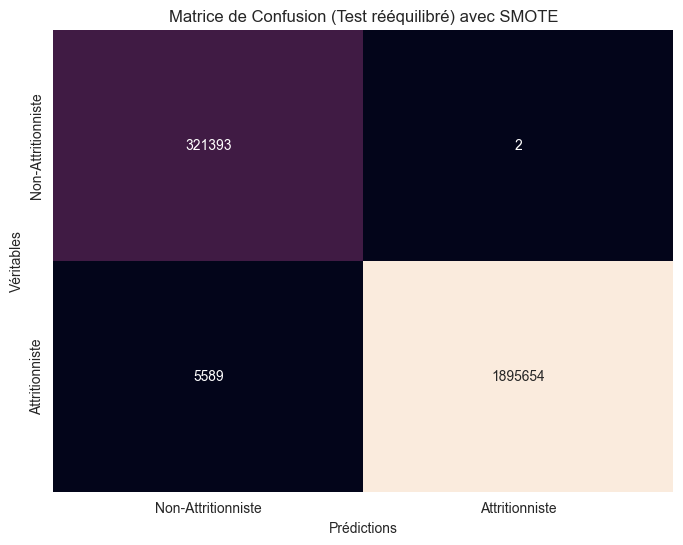

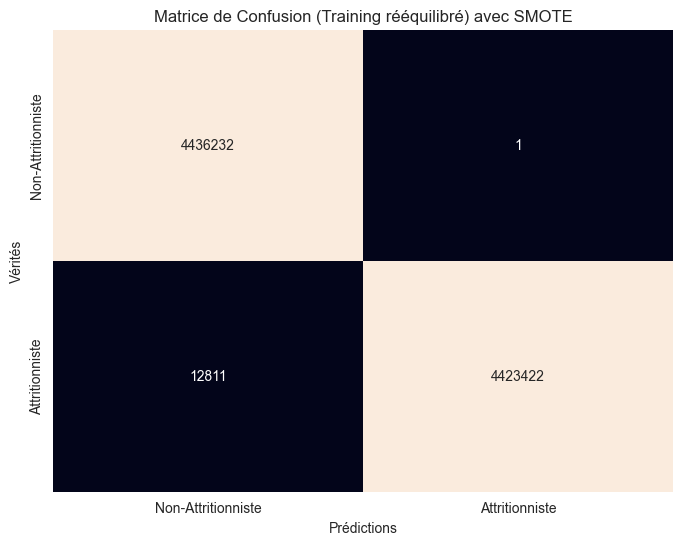

In [74]:
# Entraîner un modèle de régression logistique avec SMOTE
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train_over, y_train_over)

# Faire des prédictions sur l'ensemble de test
y_pred_smote = model.predict(X_test)

# Afficher le rapport de classification avec SMOTE
print("Évaluation du modèle avec SMOTE:")
print(classification_report(y_test, y_pred_smote, zero_division=0))

# Matrice de confusion avec SMOTE
plt.figure(figsize=(8, 6))
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.title('Matrice de Confusion (Test rééquilibré) avec SMOTE')
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()

# Prédiction sur l'ensemble d'entraînement rééquilibré
y_train_pred = model.predict(X_train_over)
y_train_prob = model.predict_proba(X_train_over)[:, 1]  # Probabilité pour la classe positive (attrition)

# Calcul de la matrice de confusion pour l'ensemble d'entraînement
train_conf_matrix = confusion_matrix(y_train_over, y_train_pred)

# Visualisation de la matrice de confusion pour l'ensemble d'entraînement
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion (Training rééquilibré) avec SMOTE')
plt.show()


Courbes ROC Test+Train

/Users/rafikaayari/PycharmProjectsdatascience/pythonProject/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


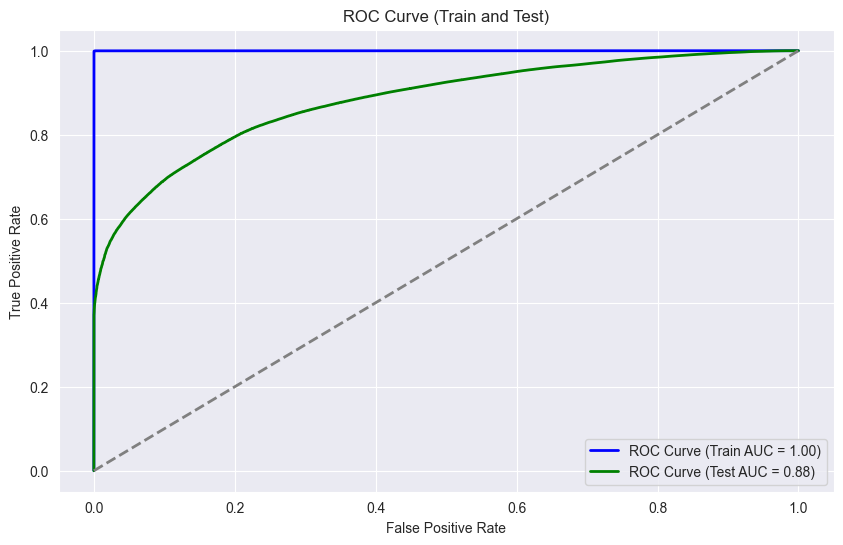

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Vérifier les dimensions
assert X_train.shape[0] == y_train.shape[0], "Inconsistent samples in training data"
assert X_test.shape[0] == y_test.shape[0], "Inconsistent samples in testing data"

# Entraîner le modèle de régression logistique avec sklearn
# Entraîner un modèle de régression logistique avec SMOTE
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train_over, y_train_over)

# Prédiction sur l'ensemble d'entraînement rééquilibré
y_train_pred = model.predict(X_train_over)
y_train_prob = model.predict_proba(X_train_over)[:, 1]
train_roc_auc = auc(fpr_train, tpr_train)  # Calculer l'AUC pour l'ensemble d'apprentissage

# Prédictions des probabilités pour l'ensemble de test
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
test_roc_auc = auc(fpr_test, tpr_test)  # Calculer l'AUC pour l'ensemble de test

# Tracer les courbes ROC pour les deux ensembles sur le même graphique
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC Curve (Train AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Curve (Test AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne pour une prévision aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train and Test)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ANALYSE DE ROBUSTESSE

In [78]:

import numpy as np

# Extraction des coefficients du modèle
coefficients = model.coef_[0]
print("Coefficients du modèle :")
for feature, coefficient in zip(X, coefficients):
    print(f"{feature}: {coefficient:.4f}")

Coefficients du modèle :
MAGASIN: 0.0035
SEXE: -0.0238
AGE_GROUP: 0.0033
ANCIENNETE_ADHESION_CAT: -0.0626
ANCIENNETE_READ: -0.0037
LIBELLEDEPARTEMENT: 0.0013
TIC_TOTALTTC: -0.0005
FREQ_MAG: -0.0019
TYPE_UNIVERS: 0.2829
Quantite: 0.0095
NBRE_ARTICLE: -0.0190
NBRE_FAM_ARTICLE: 0.1461
TOTAL_REMISE: 0.0036
Variete_Panier: 0.0082
UNIVERS_PREFERE: 0.0125
TOTAL_ACHAT_2016: 0.0001
ANCIENNETE_1ERE_CDE_2016: 0.0028
ANCIENNETE_DERNIERE_CDE_2016: 8.1484
TEMPS_MOY_CDE_2016: -8.1129
FREQ_COMMANDE_2016: -3.2349


In [79]:
import pandas as pd

# Coefficients du modèle
coefficients = {
    "Variable": ["MAGASIN", "SEXE", "AGE_GROUP", "ANCIENNETE_ADHESION_CAT", "ANCIENNETE_READ", "LIBELLEDEPARTEMENT", 
                 "TIC_TOTALTTC", "FREQ_MAG", "TYPE_UNIVERS", "Quantite", "NBRE_ARTICLE", "NBRE_FAM_ARTICLE", 
                 "TOTAL_REMISE", "Variete_Panier", "UNIVERS_PREFERE", "TOTAL_ACHAT_2016", "ANCIENNETE_1ERE_CDE_2016", 
                 "ANCIENNETE_DERNIERE_CDE_2016", "TEMPS_MOY_CDE_2016", "FREQ_COMMANDE_2016"],
    "Coefficient": [0.0035, -0.0238, 0.0033, -0.0626, -0.0037, 0.0013, -0.0005, -0.0019, 0.2829, 0.0095, -0.0190, 
                    0.1461, 0.0036, 0.0082, 0.0125, 0.0001, 0.0028, 8.1484, -8.1129, -3.2349]
}

# Créer un DataFrame à partir des coefficients
df_coefficients = pd.DataFrame(coefficients)

# Afficher le DataFrame
print(df_coefficients)

                        Variable  Coefficient
0                        MAGASIN       0.0035
1                           SEXE      -0.0238
2                      AGE_GROUP       0.0033
3        ANCIENNETE_ADHESION_CAT      -0.0626
4                ANCIENNETE_READ      -0.0037
5             LIBELLEDEPARTEMENT       0.0013
6                   TIC_TOTALTTC      -0.0005
7                       FREQ_MAG      -0.0019
8                   TYPE_UNIVERS       0.2829
9                       Quantite       0.0095
10                  NBRE_ARTICLE      -0.0190
11              NBRE_FAM_ARTICLE       0.1461
12                  TOTAL_REMISE       0.0036
13                Variete_Panier       0.0082
14               UNIVERS_PREFERE       0.0125
15              TOTAL_ACHAT_2016       0.0001
16      ANCIENNETE_1ERE_CDE_2016       0.0028
17  ANCIENNETE_DERNIERE_CDE_2016       8.1484
18            TEMPS_MOY_CDE_2016      -8.1129
19            FREQ_COMMANDE_2016      -3.2349


1. **MAGASIN: 0.0035**
   - Un effet légèrement positif sur la variable dépendante.
   
2. **SEXE: -0.0238**
   - Indique que le sexe a un effet négatif sur la variable dépendante.

3. **AGE_GROUP: 0.0033**
   - L'âge a un effet faiblement positif sur la variable dépendante.

4. **ANCIENNETE_ADHESION_CAT: -0.0626**
   - Une plus grande ancienneté d'adhésion a un effet négatif substantiell comparable sur la variable dépendante.

5. **ANCIENNETE_READ: -0.0037**
   - Un effet légèrement négatif sur la variable dépendante.

6. **LIBELLEDEPARTEMENT: 0.0013**
   - Un effet faible et positif du département sur la variable dépendante.

7. **TIC_TOTALTTC: -0.0005**
   - Une faible relation négative avec la variable dépendante.

8. **FREQ_MAG: -0.0019**
   - Une fréquence plus élevée de visite au magasin a un effet faiblement négatif sur la variable dépendante.

9. **TYPE_UNIVERS: 0.2829**
   - Une forte relation positive entre le type d'univers et la variable dépendante.

10. **Quantite: 0.0095**
    - L'effet positif de la quantité sur la variable dépendante.

11. **NBRE_ARTICLE: -0.0190**
    - Nombre d'articles achetés a un effet légèrement négatif.

12. **NBRE_FAM_ARTICLE: 0.1461**
    - Un effet positif modéré sur la variable dépendante.

13. **TOTAL_REMISE: 0.0036**
    - Un coefficient montrant un faible effet positif des remises sur la variable dépendante.

14. **Variete_Panier: 0.0082**
    - Diversité du panier a un effet faiblement positif.

15. **UNIVERS_PREFERE: 0.0125**
    - Préférence pour un univers spécifique a un effet positif faible à modéré.

16. **TOTAL_ACHAT_2016: 0.0001**
    - Une relation positive très faible avec la variable dépendante.

17. **ANCIENNETE_1ERE_CDE_2016: 0.0028**
    - Un effet très faible et positif de l'ancienneté de la première commande en 2016.

18. **ANCIENNETE_DERNIERE_CDE_2016: 8.1484**
    - Un coefficient très élevé montrant une forte relation positive.

19. **TEMPS_MOY_CDE_2016: -8.1129**
    - Une forte relation négative avec la variable dépendante.

20. **FREQ_COMMANDE_2016: -3.2349**
    - Plus fréquent sur les commandes de 2016 a un effet fortement négatif.

#### Notes:

- **Grosseurs des coefficients**: Les variables avec des coefficients plus élevés (soit positifs, soit négatifs) ont une plus grande influence sur la variable dépendante.
- **Importance de l'échelle**: Les magnitudes des coefficients peuvent aussi être influencées par l'échelle des variables indépendantes.

Pour un alignement spécifique avec les objectifs de l'étude, des tests de significativité (comme les p-values dans un modèle de régression linéaire) seraient souvent nécessaires pour interpréter et valider ces coefficients correctement.

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                         feature        VIF
0                        MAGASIN   3.763206
1                           SEXE   1.822575
2                      AGE_GROUP   7.249876
3        ANCIENNETE_ADHESION_CAT   9.736423
4                ANCIENNETE_READ   2.421740
5             LIBELLEDEPARTEMENT   4.429518
6                   TIC_TOTALTTC   3.322911
7                       FREQ_MAG   6.116496
8                   TYPE_UNIVERS   2.692572
9                       Quantite   3.022904
10                  NBRE_ARTICLE   5.620943
11              NBRE_FAM_ARTICLE   6.123321
12                  TOTAL_REMISE   1.437115
13                Variete_Panier  11.612883
14               UNIVERS_PREFERE   1.005521
15              TOTAL_ACHAT_2016   5.882579
16      ANCIENNETE_1ERE_CDE_2016  27.368799
17  ANCIENNETE_DERNIERE_CDE_2016   2.773823
18            TEMPS_MOY_CDE_2016   4.693703
19            FREQ_COMMANDE_2016   1.311870


- **p-values < 0.05**: Les coefficients associés sont généralement considérés comme statistiquement significatifs (au niveau de 5%).
- Les p-values supérieures à ce seuil peuvent indiquer que la variable n'a peut-être pas une influence significative sur la variable dépendante.

SUPPRESSION DES VARIABLES NON SIGNIFICATIVES ET RÉ-ITÉRATION

In [93]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Entraîner un modèle de régression logistique avec SMOTE
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train_over, y_train_over)

# Appliquer RFE pour sélectionner les fonctionnalités
rfe = RFE(model, n_features_to_select=15)
rfe.fit(X_train_over, y_train_over)

# Afficher les colonnes sélectionnées
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['SEXE', 'AGE_GROUP', 'ANCIENNETE_ADHESION_CAT', 'TIC_TOTALTTC',
       'FREQ_MAG', 'Quantite', 'NBRE_ARTICLE', 'NBRE_FAM_ARTICLE',
       'TOTAL_REMISE', 'UNIVERS_PREFERE', 'TOTAL_ACHAT_2016',
       'ANCIENNETE_1ERE_CDE_2016', 'ANCIENNETE_DERNIERE_CDE_2016',
       'TEMPS_MOY_CDE_2016', 'FREQ_COMMANDE_2016'],
      dtype='object')


Analyse du modèle après itération 

In [94]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que nous avons les données X et y déjà disponibles

# Ajouter une constante (qui représente l'interception)
X = sm.add_constant(X) if not 'const' in X.columns else X

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer SMOTE à l'ensemble d'apprentissage
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

# Entraîne le modèle initial
model = LogisticRegression()

# Sélectionner les fonctionnalités avec RFE
rfe = RFE(model, n_features_to_select=15)
rfe.fit(X_train_over, y_train_over)

# Transformer les ensembles d'apprentissage et de test pour ne conserver que les fonctionnalités sélectionnées
X_train_over_selected = X_train_over[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

# Entraîner le modèle sur les caractéristiques sélectionnées
model.fit(X_train_over_selected, y_train_over)

# Prédictions sur l'ensemble d'apprentissage et de test avec les fonctionnalités sélectionnées
y_train_pred = model.predict(X_train_over_selected)
y_test_pred = model.predict(X_test_selected)

# Calcul des métriques de performance sur l'ensemble d'apprentissage
train_accuracy = accuracy_score(y_train_over, y_train_pred)
train_precision = precision_score(y_train_over, y_train_pred, zero_division=1)
train_recall = recall_score(y_train_over, y_train_pred, zero_division=1)
train_f1 = f1_score(y_train_over, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_over, y_train_pred)
train_roc_auc = roc_auc_score(y_train_over, model.predict_proba(X_train_over_selected)[:, 1])

# Calcul des métriques de performance sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=1)
test_recall = recall_score(y_test, y_test_pred, zero_division=1)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])

# Affichage des résultats
print(f"Ensemble d'apprentissage :")
print(f"Accuracy : {train_accuracy}")
print(f"Precision : {train_precision}")
print(f"Recall : {train_recall}")
print(f"F1 Score : {train_f1}")
print(f"AUC ROC : {train_roc_auc}")
print(f"Confusion Matrix :\n{train_conf_matrix}")
print("\nRapport de classification :\n", classification_report(y_train_over, y_train_pred))

print(f"\nEnsemble de test :")
print(f"Accuracy : {test_accuracy}")
print(f"Precision : {test_precision}")
print(f"Recall : {test_recall}")
print(f"F1 Score : {test_f1}")
print(f"AUC ROC : {test_roc_auc}")
print(f"Confusion Matrix :\n{test_conf_matrix}")
print("\nRapport de classification :\n", classification_report(y_test, y_test_pred))

Ensemble d'apprentissage :
Accuracy : 0.9989970093996415
Precision : 0.9999986447862895
Recall : 0.9979953712981261
F1 Score : 0.9989960037587525
AUC ROC : 0.9999998229374443
Confusion Matrix :
[[4436227       6]
 [   8893 4427340]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4436233
           1       1.00      1.00      1.00   4436233

    accuracy                           1.00   8872466
   macro avg       1.00      1.00      1.00   8872466
weighted avg       1.00      1.00      1.00   8872466


Ensemble de test :
Accuracy : 0.9982412790566885
Precision : 0.9999989458915597
Recall : 0.9979450285944511
F1 Score : 0.9989709315136363
AUC ROC : 0.9999997795663181
Confusion Matrix :
[[ 321393       2]
 [   3907 1897336]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    321395
           1       1.00      1.00      1.00  

Matrice de confusion Test+Train

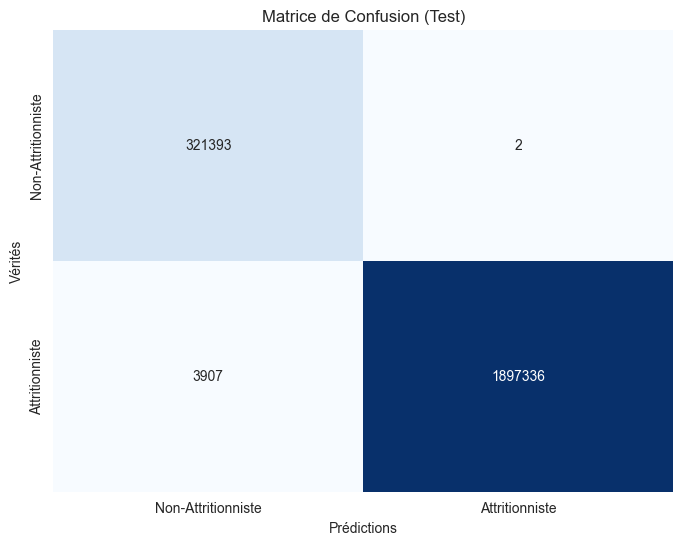

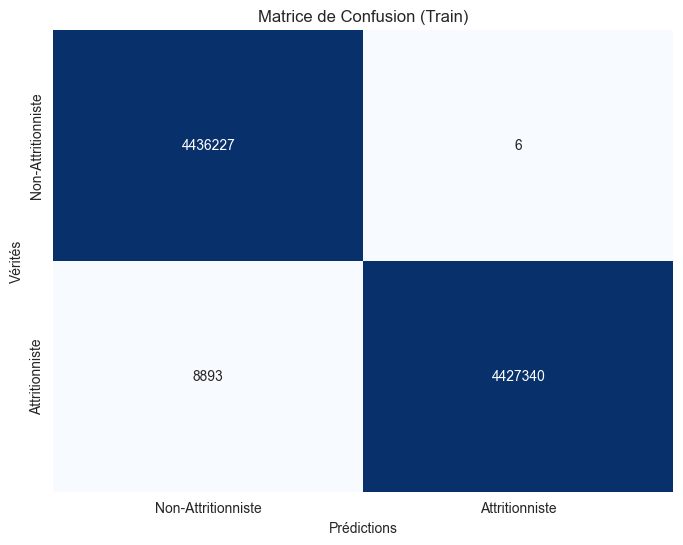

In [95]:
# Visualisation de la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion (Test)')
plt.show()

# Visualisation de la matrice de confusion pour l'ensemble d'apprentissage
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Attritionniste', 'Attritionniste'],
            yticklabels=['Non-Attritionniste', 'Attritionniste'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion (Train)')
plt.show()

Courbes ROC Test+Train

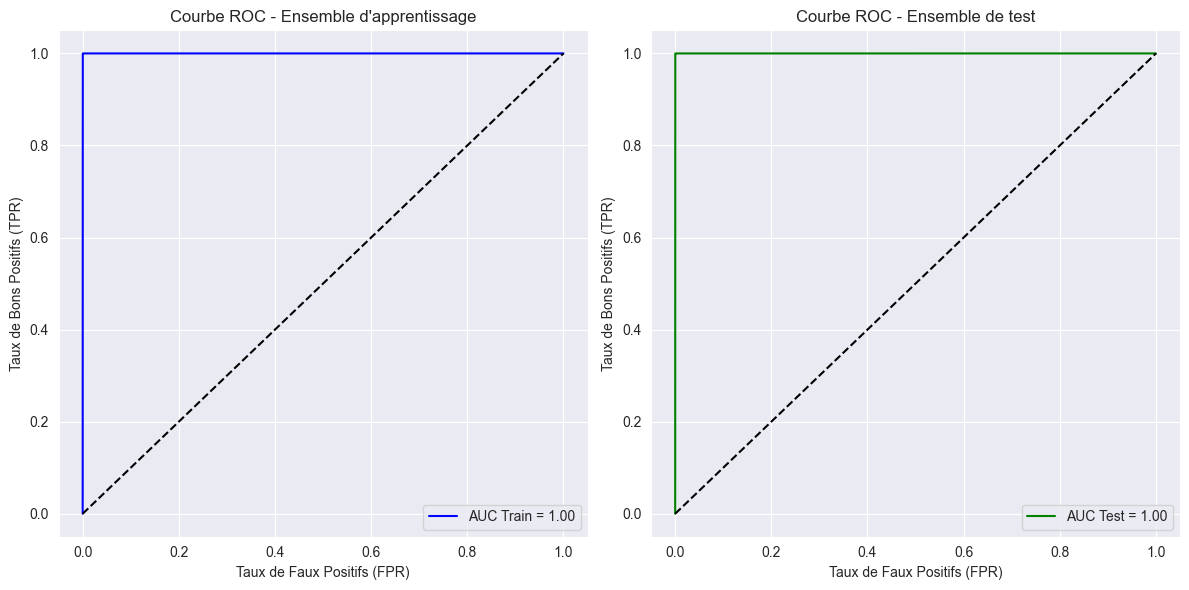

In [96]:
# Importation nécessaire pour le traçage de courbes ROC
from sklearn.metrics import roc_curve
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])
# Calcul des probabilités d'appartenance à la classe positive
y_train_pred_prob = model.predict_proba(X_train_over_selected)[:, 1]
y_test_pred_prob = model.predict_proba(X_test_selected)[:, 1]

# Calcul des courbes ROC pour les ensembles d'apprentissage et de test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_over, y_train_pred_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)

# Tracé de la courbe ROC
plt.figure(figsize=(12, 6))

# Courbe ROC pour l'ensemble d'apprentissage
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='blue', label=f'AUC Train = {train_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale pour le hasard
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Bons Positifs (TPR)')
plt.title('Courbe ROC - Ensemble d\'apprentissage')
plt.legend(loc='lower right')

# Courbe ROC pour l'ensemble de test
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='green', label=f'AUC Test = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale pour le hasard
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Bons Positifs (TPR)')
plt.title('Courbe ROC - Ensemble de test')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

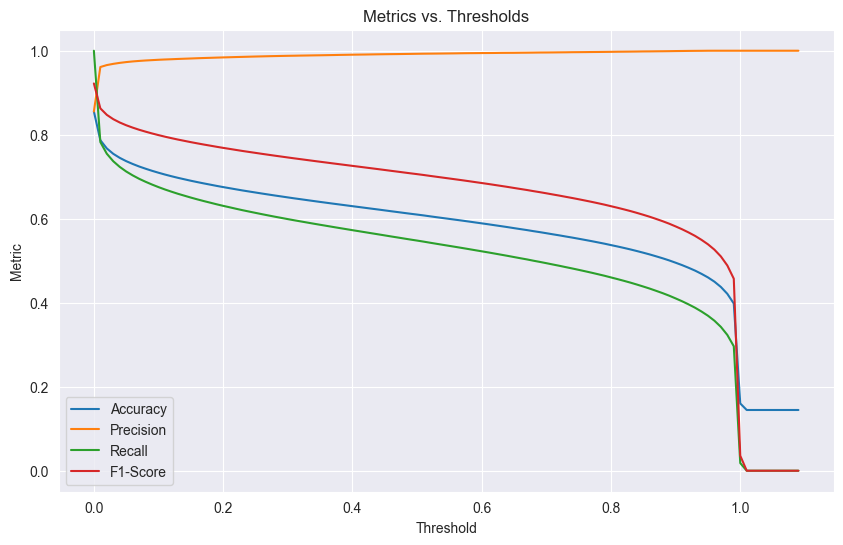

Optimal Threshold: 0.00
Best F1 Score: 0.92
Evaluation du modèle avec seuil optimisé 0.00 :
Precision: 0.86
Rappel: 1.00
F1 Score: 0.92
Exactitude: 0.86


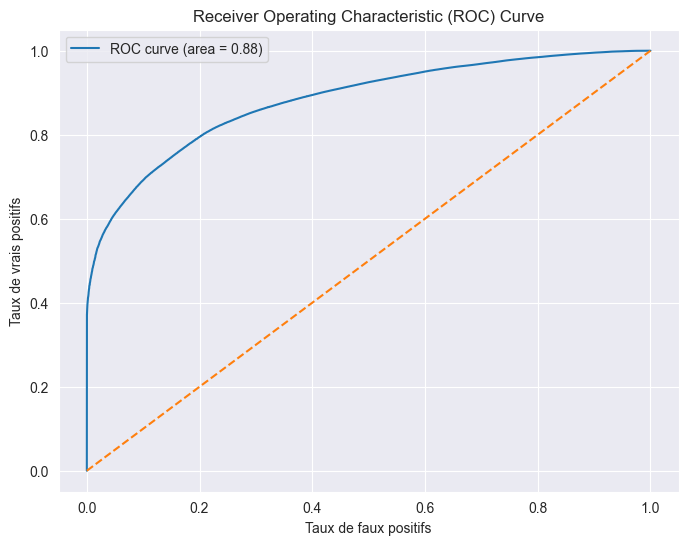

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Analyse des performances selon divers seuils
def plot_metrics_vs_thresholds(y_test, y_test_prob):
    thresholds = np.arange(0.0, 1.1, 0.01)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for threshold in thresholds:
        y_pred_adj = (y_test_prob >= threshold).astype(int)
        accuracies.append(accuracy_score(y_test, y_pred_adj))
        precisions.append(precision_score(y_test, y_pred_adj, zero_division=1))
        recalls.append(recall_score(y_test, y_pred_adj, zero_division=1))
        f1s.append(f1_score(y_test, y_pred_adj, zero_division=1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label='Accuracy')
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1s, label='F1-Score')
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.title('Metrics vs. Thresholds') 
    plt.legend()
    plt.show()

# Comparer des performances avec divers seuils
plot_metrics_vs_thresholds(y_test, y_test_prob)

# Optimisation avec le seuil basé sur F1-score
thresholds = np.arange(0.0, 1.1, 0.01)
f1s = [f1_score(y_test, (y_test_prob >= threshold).astype(int), zero_division=1) for threshold in thresholds]
optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Best F1 Score: {f1s[optimal_idx]:.2f}")

# Ajustement de prédictions avec le nouveau seuil
y_pred_optimal = (y_test_prob >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal, zero_division=1)
recall = recall_score(y_test, y_pred_optimal, zero_division=1)
f1 = f1_score(y_test, y_pred_optimal, zero_division=1)

print(f"Evaluation du modèle avec seuil optimisé {optimal_threshold:.2f} :")
print(f"Precision: {precision:.2f}")
print(f"Rappel: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Exactitude: {accuracy:.2f}")

# Affichage de la courbe ROC et de la AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

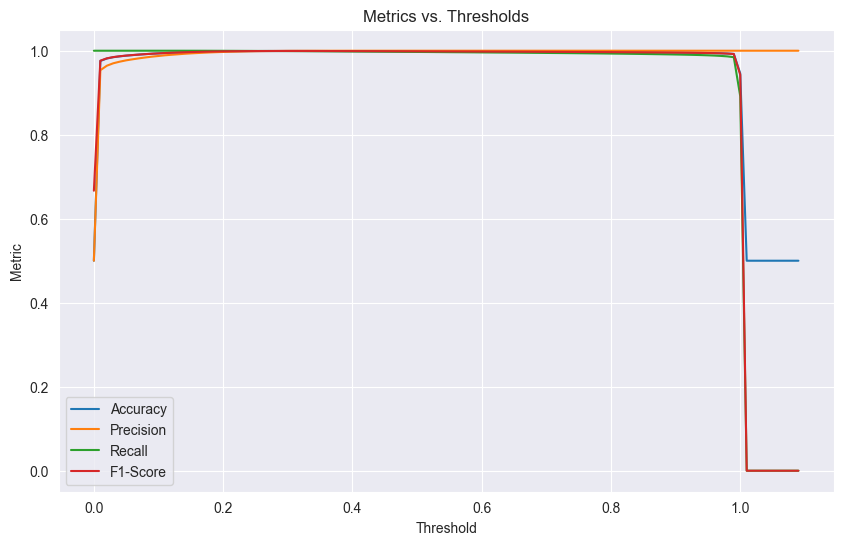

Optimal Threshold: 0.30
Best F1 Score: 1.00
Evaluation du modèle avec seuil optimisé 0.30 :
Precision: 1.00
Rappel: 1.00
F1 Score: 1.00
Exactitude: 1.00


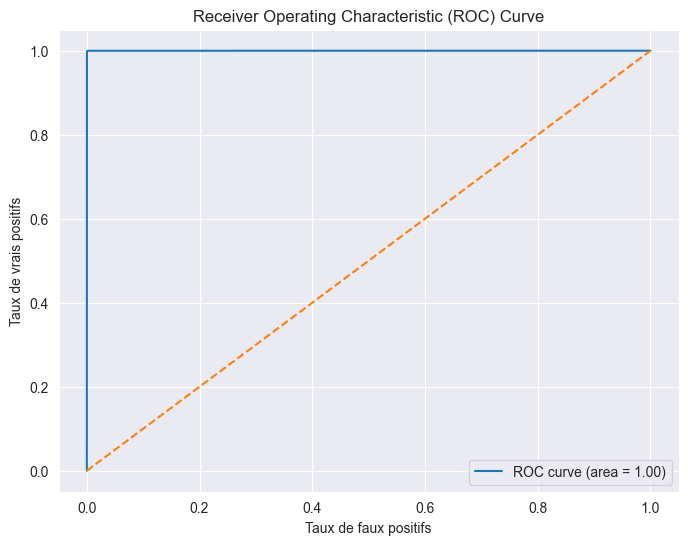

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Analyse des performances selon divers seuils
def plot_metrics_vs_thresholds(y_train_over, y_train_prob):
    thresholds = np.arange(0.0, 1.1, 0.01)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for threshold in thresholds:
        y_pred_adj = (y_train_prob >= threshold).astype(int)
        accuracies.append(accuracy_score(y_train_over, y_pred_adj))
        precisions.append(precision_score(y_train_over, y_pred_adj, zero_division=1))
        recalls.append(recall_score(y_train_over, y_pred_adj, zero_division=1))
        f1s.append(f1_score(y_train_over, y_pred_adj, zero_division=1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label='Accuracy')
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1s, label='F1-Score')
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.title('Metrics vs. Thresholds') 
    plt.legend()
    plt.show()

# Comparer des performances avec divers seuils
plot_metrics_vs_thresholds(y_train_over, y_train_prob)

# Optimisation avec le seuil basé sur F1-score
thresholds = np.arange(0.0, 1.1, 0.01)
f1s = [f1_score(y_train_over, (y_train_prob >= threshold).astype(int), zero_division=1) for threshold in thresholds]
optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Best F1 Score: {f1s[optimal_idx]:.2f}")

# Ajustement de prédictions avec le nouveau seuil
y_pred_optimal = (y_train_prob >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_train_over, y_pred_optimal)
precision = precision_score(y_train_over, y_pred_optimal, zero_division=1)
recall = recall_score(y_train_over, y_pred_optimal, zero_division=1)
f1 = f1_score(y_train_over, y_pred_optimal, zero_division=1)

print(f"Evaluation du modèle avec seuil optimisé {optimal_threshold:.2f} :")
print(f"Precision: {precision:.2f}")
print(f"Rappel: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Exactitude: {accuracy:.2f}")

# Affichage de la courbe ROC et de la AUC
fpr, tpr, thresholds_roc = roc_curve(y_train_over, y_train_prob)
roc_auc = roc_auc_score(y_train_over, y_train_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

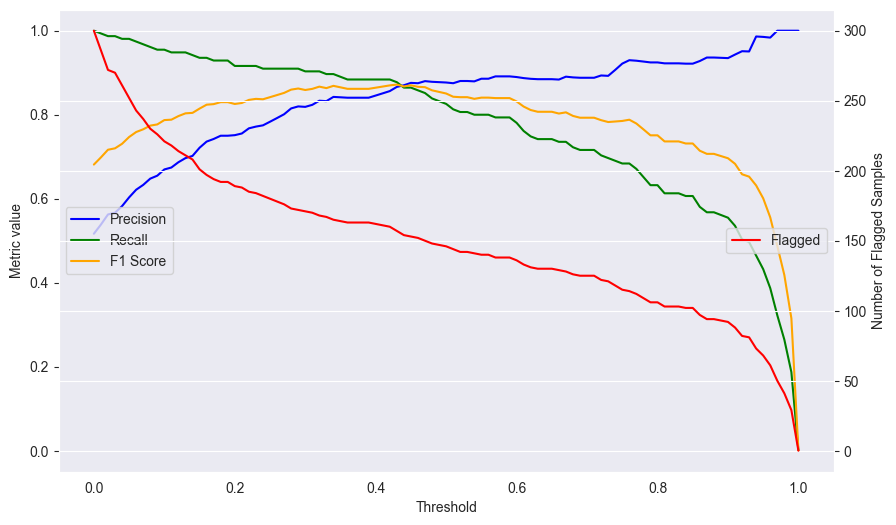

Seuil optimal basé sur le F1 Score: 0.43
Precision: 0.8662420382165605
Recall: 0.8774193548387097
F1 Score: 0.8717948717948718


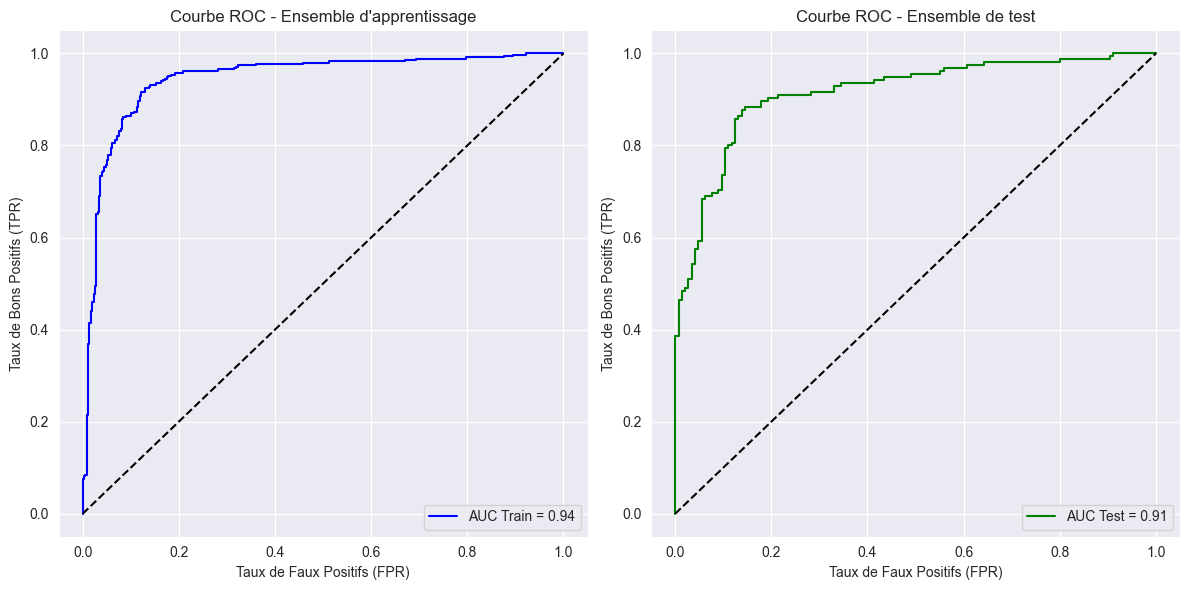

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Exemple de code de base pour entraîner un modèle de régression logistique suivi d'une ROC et d'autres courbes.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Création de données fictives pour l'exemple
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Probabilités prédictives pour chaque échantillon
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

def plot_metrics_vs_thresholds(y_true, y_prob):
    thresholds = np.arange(0, 1.01, 0.01)
    metrics = []

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=1)
        recall = recall_score(y_true, y_pred, zero_division=1)
        f1 = f1_score(y_true, y_pred, zero_division=1)
        n_flagged = np.sum(y_pred)
        metrics.append([threshold, precision, recall, f1, n_flagged])

    metrics = pd.DataFrame(metrics, columns=['threshold', 'precision', 'recall', 'f1', 'n_flagged'])

    plt.figure(figsize=(10, 6))
    
    # Tracer precision, recall, et f1 score
    plt.plot(metrics['threshold'], metrics['precision'], color='blue', label='Precision')
    plt.plot(metrics['threshold'], metrics['recall'], color='green', label='Recall')
    plt.plot(metrics['threshold'], metrics['f1'], color='orange', label='F1 Score')

    plt.xlabel('Threshold')
    plt.ylabel('Metric value')
    plt.grid()
    plt.legend(loc='center left')

    # Nouvelle axis pour `flagged`
    ax = plt.twinx()
    ax.plot(metrics['threshold'], metrics['n_flagged'], label='Flagged', color='red')

    plt.ylabel('Number of Flagged Samples')
    ax.legend(loc='center right')

    plt.show()

# Tracé des courbes des métriques vis-à-vis des seuils sur les données de test
plot_metrics_vs_thresholds(y_test, y_test_prob)

# Calcul et affichage du seuil optimal basé sur le F1-score
thresholds = np.arange(0, 1.01, 0.01)
f1s = [f1_score(y_test, (y_test_prob >= threshold).astype(int), zero_division=1) for threshold in thresholds]
optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]

print(f"Seuil optimal basé sur le F1 Score: {optimal_threshold:.2f}")

# Recalibrage des prédictions avec le seuil trouvé
y_test_pred_optimal = (y_test_prob >= optimal_threshold).astype(int)

# Exemples de mesure
print("Precision:", precision_score(y_test, y_test_pred_optimal))
print("Recall:", recall_score(y_test, y_test_pred_optimal))
print("F1 Score:", f1_score(y_test, y_test_pred_optimal))

# Maintenant, traçons également la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

train_roc_auc = auc(fpr_train, tpr_train)
test_roc_auc = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='blue', label=f'AUC Train = {train_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Bons Positifs (TPR)')
plt.title('Courbe ROC - Ensemble d\'apprentissage')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='green', label=f'AUC Test = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Bons Positifs (TPR)')
plt.title('Courbe ROC - Ensemble de test')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

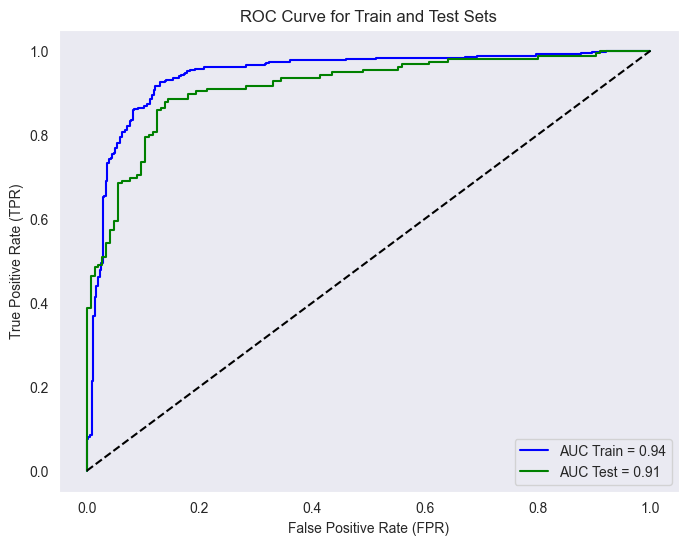

In [101]:
# Tracer la courbe ROC pour les ensembles d’entraînement et de test sur le même graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'AUC Train = {train_roc_auc:.2f}')
plt.plot(fpr_test, tpr_test, color='green', label=f'AUC Test = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour une prédiction aléatoire

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Train and Test Sets')
plt.legend(loc='lower right')
plt.grid()
plt.show()


HYPERPARAMETRER TUNING 

In [102]:
#Hyperparameter Tuning à l'aide de GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
 
# Créer pipeline avec scaler et regression logistique
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))
 
# Créer le paramètre grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}
 
# Créer GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5)
 
# Fit the model
grid_search.fit(X, y)
 
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
Best Score: 0.8710000000000001


In [103]:
from sklearn.model_selection import train_test_split

# Refit le meilleur modèle sur toutes les données d'entraînement
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = best_model.predict(X_test)

# Voir les performances: Rapport de classification, Matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix

print("Rapport de classification:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.82      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Matrice de confusion:
 [[128  17]
 [ 28 127]]


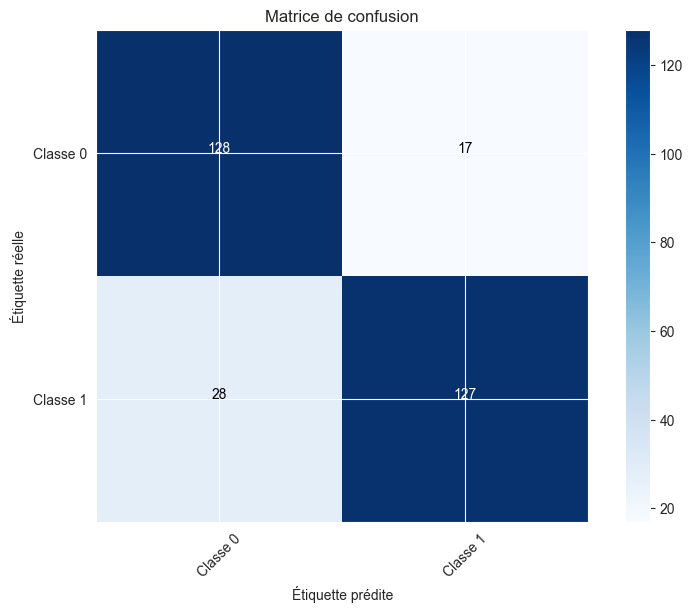

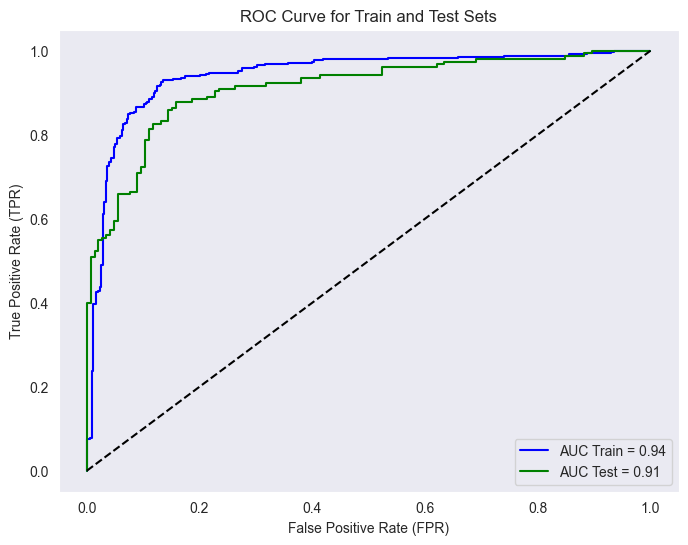

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, confusion_matrix

# Ploter la matrice de confusion
def plot_conf_matrix(cm, title='Matrice de confusion', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    classes = ['Classe 0', 'Classe 1']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Étiquette prédite')
    
import itertools

# Dessiner les courbes ROC
def plot_roc_curves(fpr_train, tpr_train, train_roc_auc, fpr_test, tpr_test, test_roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f'AUC Train = {train_roc_auc:.2f}')
    plt.plot(fpr_test, tpr_test, color='green', label=f'AUC Test = {test_roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour une prédiction aléatoire

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Train and Test Sets')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Charger votre modèle et prédire
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Calculer ROC AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

train_roc_auc = auc(fpr_train, tpr_train)
test_roc_auc = auc(fpr_test, tpr_test)

# Plot de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plot_conf_matrix(cm, title='Matrice de confusion')
plt.show()

# Tracez les courbes ROC
plot_roc_curves(fpr_train, tpr_train, train_roc_auc, fpr_test, tpr_test, test_roc_auc)

’SAUVEGARDE DU MODÈLE DÉFINITIF

In [106]:
import joblib

# Sauvegarde du modèle dans un fichier
joblib.dump(model, 'logistic_regression_model.pkl')

# Pour charger le modèle
# model = joblib.load('logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [107]:
### 1. Évaluation de la stabilité et de la robustesse avec K-Fold Cross-Validation

#La validation croisée est une méthode couramment utilisée pour évaluer la robustesse d'un modèle et pour voir comment ce modèle se généralise sur des données non vues. Vous pouvez utiliser la validation croisée afin de vérifier la stabilité des performances avec différentes partitions des données.

from sklearn.model_selection import cross_val_score

# Utiliser le meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Scores de validation croisée
cross_val_scores = cross_val_score(best_model, X, y, cv=10)  # 10-fold cross-validation
print("Scores de validation croisée: ", cross_val_scores)
print("Score moyen de validation croisée: ", cross_val_scores.mean())
print("Écart-type de validation croisée: ", cross_val_scores.std())

Scores de validation croisée:  [0.88 0.93 0.92 0.88 0.89 0.83 0.83 0.87 0.85 0.87]
Score moyen de validation croisée:  0.875
Écart-type de validation croisée:  0.031701734968294745


In [108]:
import pandas as pd

# Charger votre modèle et prédire
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Faire des prédictions et obtenir les scores de probabilité
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Créer un DataFrame pour les prédictions de test
df_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])  # Remplacez par les noms de colonnes réels si disponibles

# Ajouter les prédictions vraies et les probabilités prédites
df_test['y_true'] = y_test
df_test['prob'] =  y_test_prob

# Découper les probabilités en quantiles
df_test['quantile'] = pd.qcut(df_test['prob'], q=4, labels=False)

# Afficher le DataFrame
print(df_test)

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    -0.905336   0.040915   0.901619  -0.578651  -1.970721   0.066475   
1    -0.179620   0.724606   0.461078   0.001783   0.808571   0.554729   
2     2.890643   0.838689  -0.817095   0.252231   0.939029  -0.812271   
3     1.132287  -0.278573   1.107273   2.748782   0.999991   0.412302   
4     1.546109  -0.745190   2.259602   0.080160   0.256325   0.836444   
..         ...        ...        ...        ...        ...        ...   
295   1.108445   0.350605   0.976507   1.120686  -0.204932  -1.119419   
296  -0.909683   1.789049   0.681360   1.228981  -0.307808  -2.772994   
297  -0.749172   0.044467  -1.502871  -0.611634  -0.661541   0.521719   
298  -0.081456  -0.013940  -0.042332  -0.046497  -1.451835  -1.640245   
299  -0.074252   1.599489   0.604025   1.941746   0.088823  -1.802291   

     feature_6  feature_7  feature_8  feature_9  ...  feature_13  feature_14  \
0    -1.421669  -0.722300   0.870178  -1.18

In [109]:
# portrait robot
for quantile in range(4):
    quantile_data = df_test[df_test['quantile'] == quantile]
    print(f"\nQuantile {quantile + 1}")
    print(quantile_data.describe())
    # Pour des instructions plus spécifiques, utilisez pandas groupby et des statistiques descriptives adaptées à vos besoins


Quantile 1
       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
count  75.000000  75.000000  75.000000  75.000000  75.000000  75.000000   
mean    0.004118   0.762334   0.091359   0.147878  -0.199893  -1.651321   
std     0.983294   0.749108   0.876734   1.113628   0.935580   0.625072   
min    -2.130566  -0.835611  -2.553550  -2.153731  -2.388531  -4.154350   
25%    -0.642565   0.196033  -0.268784  -0.648144  -0.689024  -1.833301   
50%     0.039356   0.865658   0.158053   0.244897  -0.245848  -1.496362   
75%     0.532857   1.300988   0.593026   0.845884   0.460017  -1.245449   
max     2.602480   2.603034   2.500900   3.112910   1.942577  -0.729670   

       feature_6  feature_7  feature_8  feature_9  ...  feature_13  \
count  75.000000  75.000000  75.000000  75.000000  ...   75.000000   
mean   -0.031284  -0.062747  -0.147820  -0.037679  ...   -0.013065   
std     1.084564   0.967854   0.933776   0.914524  ...    0.846944   
min    -2.973306  -2.747505  -2.

In [110]:
# Recommandations concrètes
print("Les clients avec des probabilités dans les déciles supérieurs montrent généralement des caractéristiques suivantes: ...")
print("Pour réduire l'attrition, il est recommandé d'offrir des promotions ciblées à ces groupes ainsi que d'améliorer les services dans les zones identifiées comme problématiques.")

Les clients avec des probabilités dans les déciles supérieurs montrent généralement des caractéristiques suivantes: ...
Pour réduire l'attrition, il est recommandé d'offrir des promotions ciblées à ces groupes ainsi que d'améliorer les services dans les zones identifiées comme problématiques.
